# Modes of LOOCV Risk

This notebook investigates the shape of the LOOCV risk estimates as a function of $\lambda$, and in particular the number and quality of its local minima.

In [286]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import argrelmin

def plot_lambda_risks(ridgeCV, axis_labels=True, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot(ridgeCV.alphas_, ridgeCV.loo_mse_)
    local_minima = argrelmin(ridgeCV.loo_mse_, axis=0, order=1)[0]
    if len(local_minima) > 1:
        for local_min in ridgeCV.alphas[local_minima]:
            ax.axvline(local_min, ls=':', color='gray')
    ax.axvline(ridgeCV.alphas_[np.argmin(ridgeCV.loo_mse_)], ls=':', color='blue', label='$\lambda^*$')
    ax.set_xscale('log')
    ax.margins(x=0)
    if axis_labels:
        ax.legend()
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel(r'$R^\mathrm{CV}$')

### Diabetes

(442, 10)


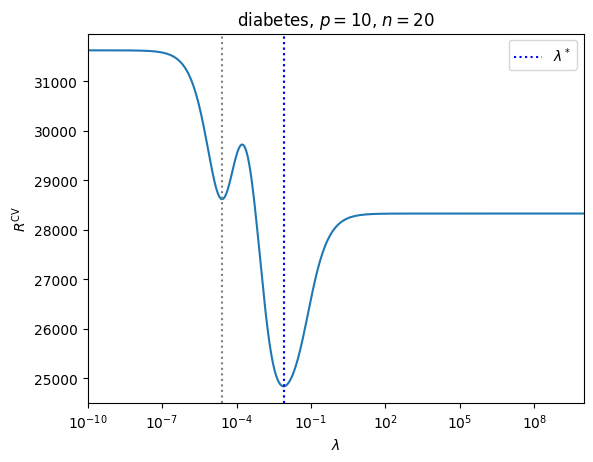

In [291]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

x, y = load_diabetes(return_X_y=True)
print(x.shape)
x, _, y, _ = train_test_split(x, y, train_size=20, shuffle=True, random_state=4)
ridgeCV = RidgeLOOCV(alphas=np.logspace(-10, 10, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV.fit(x, y)
plot_lambda_risks(ridgeCV)
plt.title('diabetes, $p=10$, $n=20$')
plt.show()

### California Housing

(20640, 8)


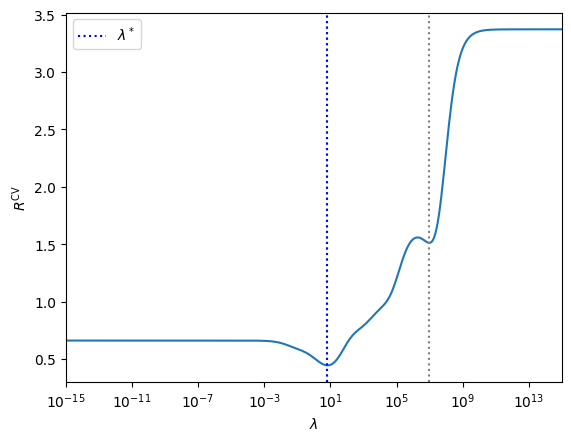

In [292]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

x, y = fetch_california_housing(return_X_y=True)
print(x.shape)
x, _, y, _ = train_test_split(x, y, train_size=16, shuffle=True, random_state=5)

ridgeCV_fixed.fit(x, y)
plot_lambda_risks(ridgeCV_fixed)

### Friedman 1

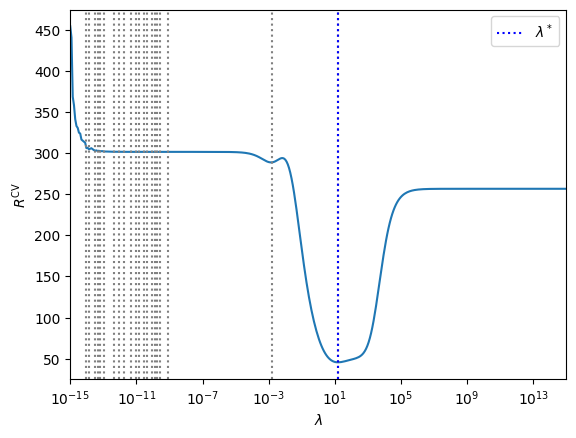

In [293]:
x, y = make_friedman1(noise=4.0, n_samples=100, n_features=100, random_state=5)
ridgeCV_fixed = RidgeLOOCV(alphas=np.logspace(-15, 15, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV_fixed.fit(x, y)
plot_lambda_risks(ridgeCV_fixed)

### Low Effective Rank Problems


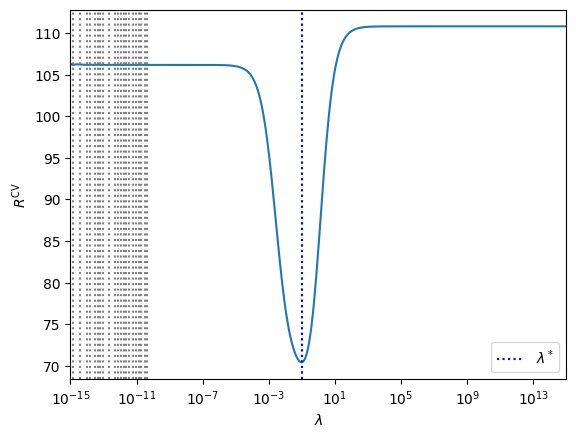

In [335]:
from sklearn.datasets import make_regression


x, y = make_regression(n_samples=100, n_features=100, effective_rank=10, noise=8.0, random_state=0, tail_strength=0.1)
ridgeCV = RidgeLOOCV(alphas=np.logspace(-15, 15, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV.fit(x, y)
plot_lambda_risks(ridgeCV)

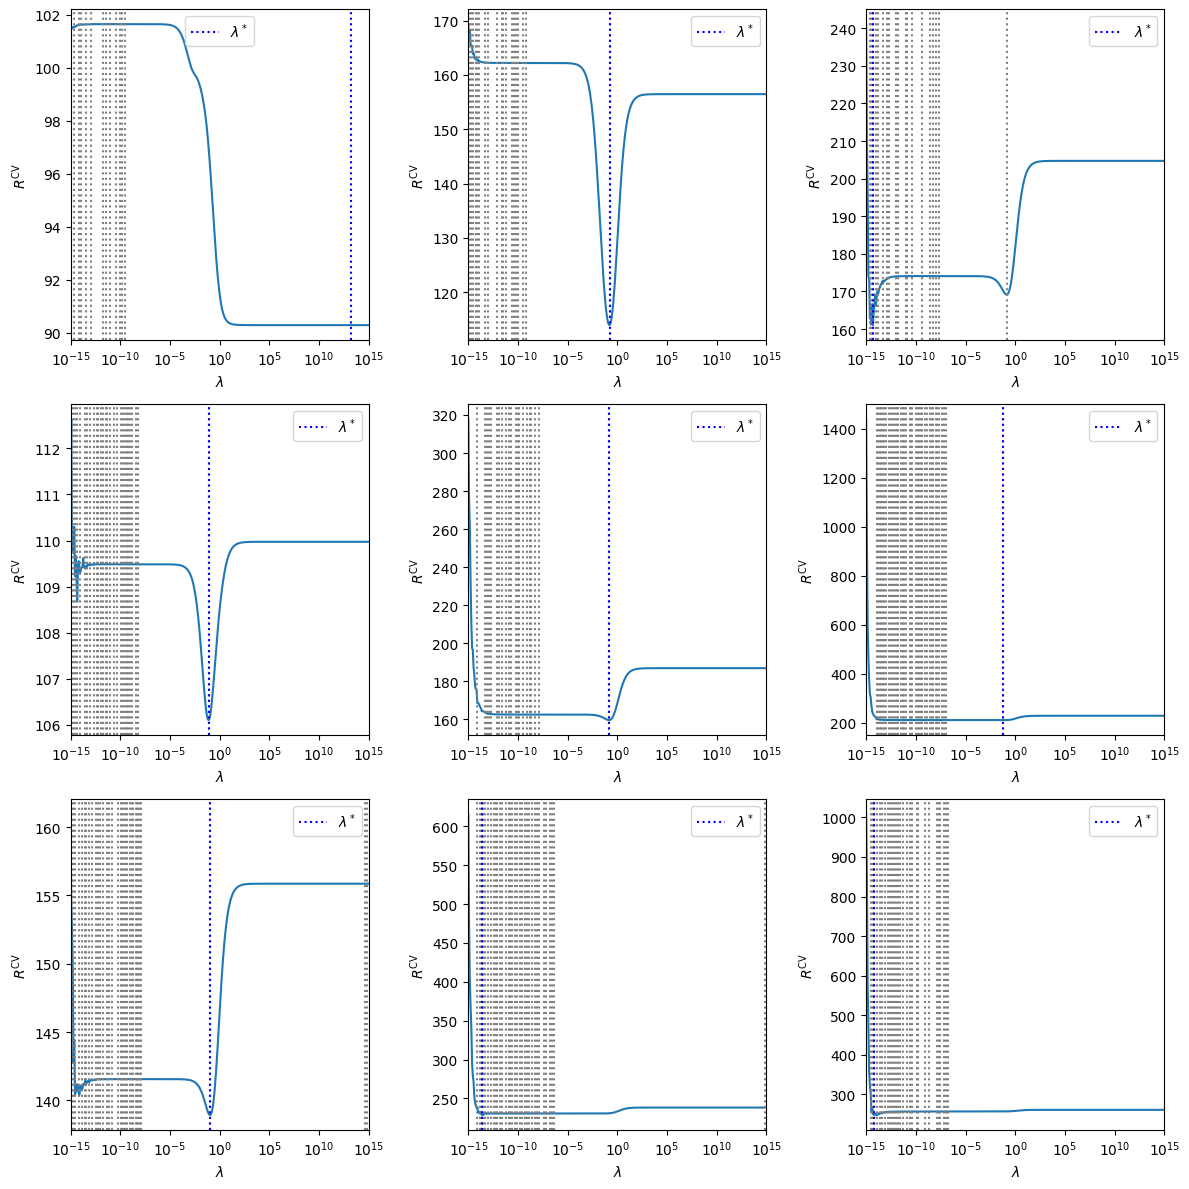

In [339]:
tail_strengths = [0.1, 0.5, 0.9]
effective_ranks = [10, 50, 90]

_, axs = plt.subplots(len(tail_strengths), len(effective_ranks), tight_layout=True, figsize=(12, 12))
for i, s in enumerate(tail_strengths):
    for j, r in enumerate(effective_ranks):
        x, y = make_regression(n_samples=100, n_features=100, effective_rank=r, noise=8.0, random_state=1, tail_strength=s)
        ridgeCV = RidgeLOOCV(alphas=np.logspace(-15, 15, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
        ridgeCV.fit(x, y)
        plot_lambda_risks(ridgeCV, ax=axs[i][j])

In [255]:
import problems
from experiments import *

problem = problems.random_sparse_factor_problem(200, sigma_eps=2)
x, y = problem.rvs(400)
x.sum(axis=0), x.shape

(array([2., 0., 3., 0., 2., 1., 2., 2., 0., 3., 4., 1., 2., 2., 4., 4., 3.,
        3., 1., 1., 2., 1., 3., 0., 1., 1., 1., 3., 4., 2., 1., 4., 1., 4.,
        1., 4., 6., 5., 2., 0., 3., 2., 2., 1., 1., 1., 3., 1., 7., 1., 3.,
        0., 0., 2., 1., 2., 2., 3., 1., 5., 1., 2., 1., 1., 3., 1., 5., 2.,
        2., 5., 4., 4., 0., 2., 2., 6., 1., 3., 1., 5., 4., 0., 0., 1., 3.,
        1., 1., 1., 2., 4., 5., 1., 7., 3., 0., 1., 1., 3., 2., 2., 2., 6.,
        0., 3., 2., 4., 1., 0., 5., 0., 1., 1., 4., 0., 5., 2., 2., 2., 1.,
        1., 2., 3., 2., 2., 1., 3., 1., 1., 5., 0., 4., 1., 2., 2., 4., 5.,
        5., 1., 2., 3., 3., 2., 2., 1., 1., 2., 4., 2., 0., 1., 1., 0., 2.,
        1., 4., 2., 1., 1., 3., 2., 0., 4., 2., 2., 2., 1., 3., 2., 4., 3.,
        2., 5., 1., 3., 3., 0., 2., 3., 2., 2., 2., 5., 0., 1., 1., 6., 3.,
        2., 1., 2., 2., 0., 2., 2., 2., 5., 2., 1., 3., 3.]),
 (400, 200))

In [256]:
from fastridge import RidgeLOOCV

ridgeCV = RidgeLOOCV(alphas=np.logspace(-20, 20, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV.fit(x, y)

ridgeCV.loo_mse_

/Users/mbol0005/Documents/fastridge/fastridge.py:143: RuntimeWarning: divide by zero encountered in divide
  self.loo_mse_[i] = np.mean((err / (1 - h))**2)
/Users/mbol0005/Documents/fastridge/fastridge.py:143: RuntimeWarning: invalid value encountered in divide
  self.loo_mse_[i] = np.mean((err / (1 - h))**2)


array([        inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         nan,         nan,
               nan,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
       14.22527412,         inf,         inf, 17.15968559,  9.63024001,
        8.98573572,  8.73219793,  8.71003949,  8.69148498,  8.68852643,
        8.69141185,  8.70929354,  8.71732004,  8.72861518,  8.7229388 ,
        8.72748281,  8.72674805,  8.72789764,  8.73062855,  8.73

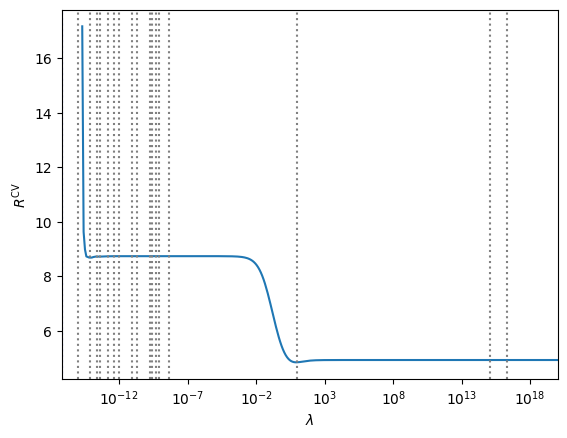

In [258]:
plot_lambda_risks(ridgeCV)

(442, 10)


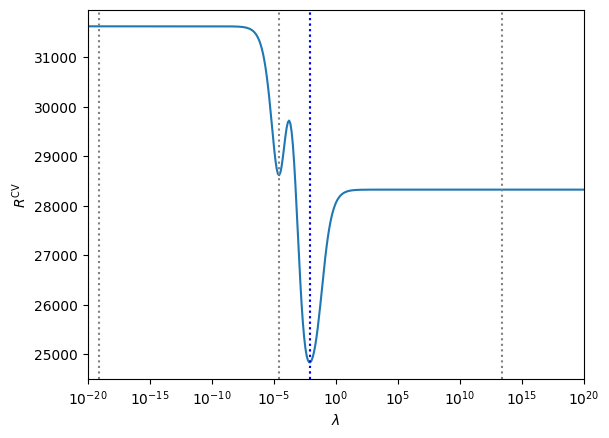

In [261]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

x, y = load_diabetes(return_X_y=True)
print(x.shape)
x, _, y, _ = train_test_split(x, y, train_size=20, shuffle=True, random_state=4)
ridgeCV = RidgeLOOCV(alphas=np.logspace(-20, 20, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV.fit(x, y)
plot_lambda_risks(ridgeCV)

# plt.plot(ridgeCV_fixed.alphas_, ridgeCV_fixed.loo_mse_)
# plt.xscale('log')

(20640, 8)


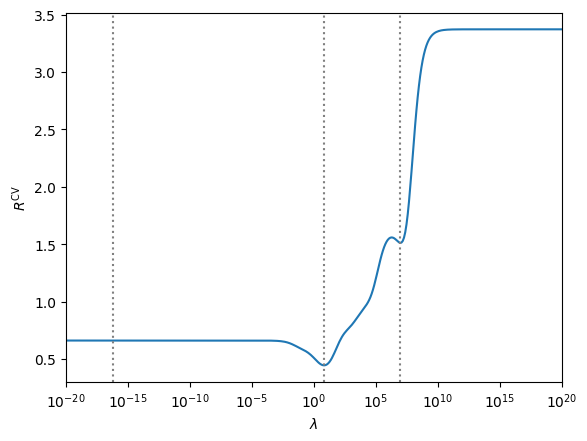

In [250]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

x, y = fetch_california_housing(return_X_y=True)
print(x.shape)
x, _, y, _ = train_test_split(x, y, train_size=16, shuffle=True, random_state=5)

ridgeCV_fixed.fit(x, y)
plot_lambda_risks(ridgeCV_fixed)
# plt.plot(ridgeCV_fixed.alphas_, ridgeCV_fixed.loo_mse_)
# plt.xscale('log')

In [173]:
from scipy.signal import argrelmin

def plot_lambda_risks(ridgeCV, axis_labels=True, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot(ridgeCV.alphas_, ridgeCV.loo_mse_)
    for local_min in ridgeCV_fixed.alphas[argrelmin(ridgeCV.loo_mse_, axis=0, order=1)[0]]:
            ax.axvline(local_min, ls=':', color='gray')
    ax.set_xscale('log')
    ax.margins(x=0)
    if axis_labels:
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel(r'$R^\mathrm{CV}$')

/Users/mbol0005/Documents/fastridge/fastridge.py:143: RuntimeWarning: divide by zero encountered in divide
  self.loo_mse_[i] = np.mean((err / (1 - h))**2)
/Users/mbol0005/Documents/fastridge/fastridge.py:143: RuntimeWarning: invalid value encountered in divide
  self.loo_mse_[i] = np.mean((err / (1 - h))**2)


47

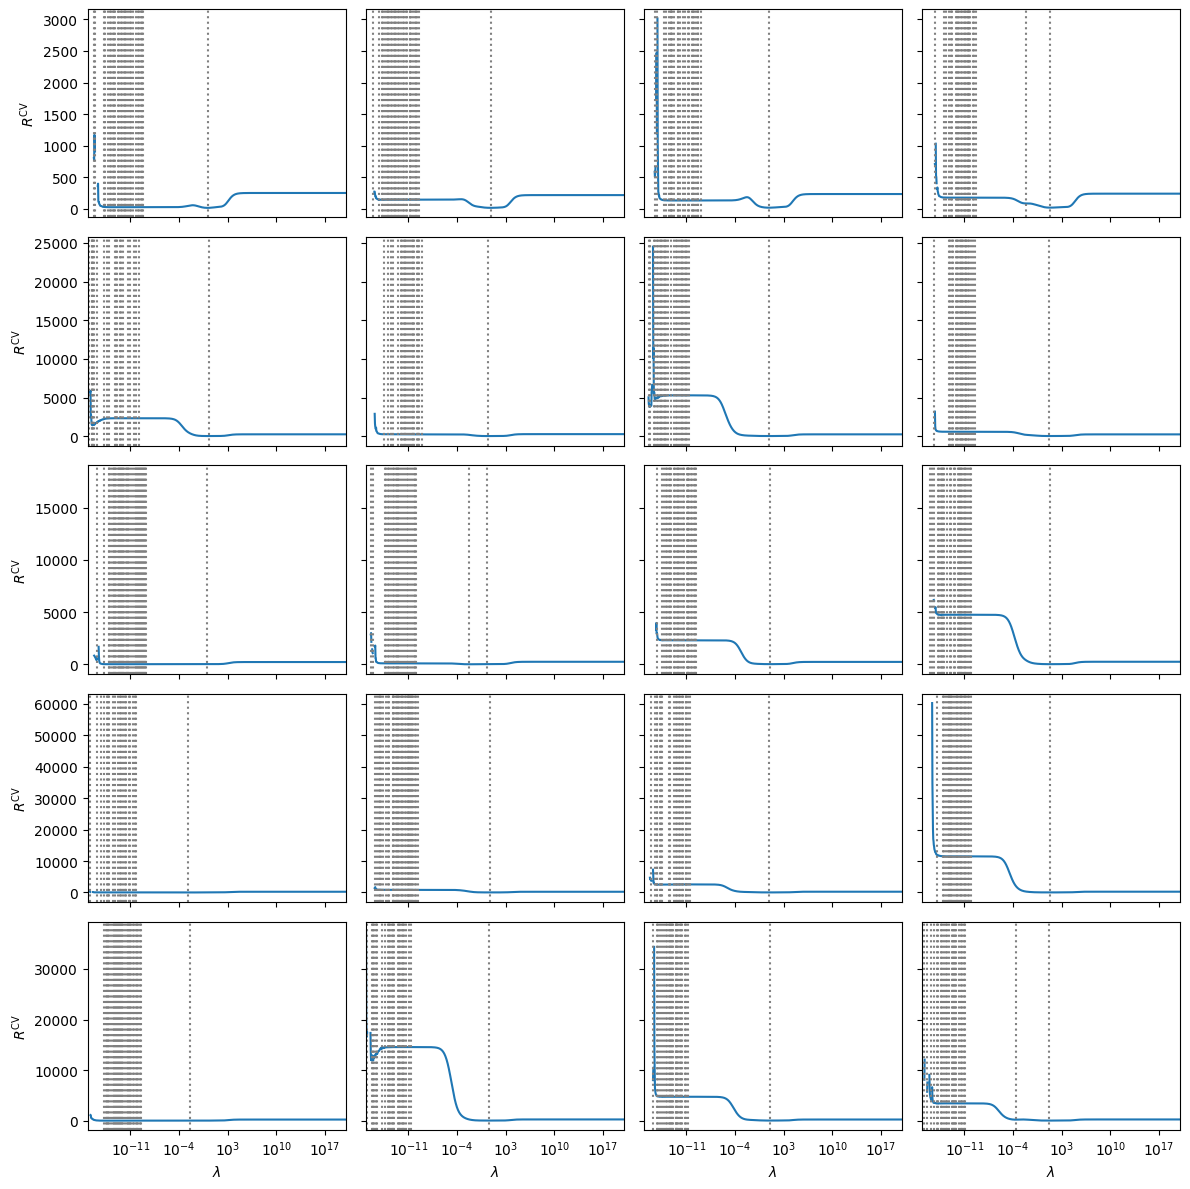

In [144]:
from sklearn.datasets import make_friedman1
from scipy.signal import argrelmin


def minima_count(ridgeCV):
    count = 0
    count += (ridgeCV.loo_mse_[0] < ridgeCV.loo_mse_[1]) 
    count += (ridgeCV.loo_mse_[-1] < ridgeCV.loo_mse_[-2])
    for i in range(1, len(ridgeCV_fixed.alphas_)-1):
        count += (ridgeCV.loo_mse_[i] < ridgeCV.loo_mse_[i+1] and ridgeCV.loo_mse_[i] < ridgeCV.loo_mse_[i-1])
    return count


def plot_lambda_risks(ridgeCV, axis_labels=True, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot(ridgeCV.alphas_, ridgeCV.loo_mse_)
    for local_min in ridgeCV_fixed.alphas[argrelmin(ridgeCV_fixed.loo_mse_, axis=0, order=2)[0]]:
            ax.axvline(local_min, ls=':', color='gray')
    ax.set_xscale('log')
    ax.margins(x=0)
    if axis_labels:
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel(r'$R^\mathrm{CV}$')

seeds = [0, 1, 2, 3, 4]
ns = [50, 100, 200, 400]

_, axs = plt.subplots(len(seeds), len(ns), sharex=True, sharey='row', tight_layout=True, figsize=(12, 12))

for j, n in enumerate(ns):
    for i, seed in enumerate(seeds):
        x, y = make_friedman1(noise=2.0, n_samples=n, n_features=n, random_state=seed)
        ridgeCV_fixed = RidgeLOOCV(alphas=np.logspace(-20, 20, 1000, endpoint=True, base=10), fit_intercept=False, normalize=False)
        ridgeCV_fixed.fit(x, y)
        plot_lambda_risks(ridgeCV_fixed, axis_labels=False, ax=axs[i, j])
        
    axs[-1, j].set_xlabel('$\lambda$')

for i in range(len(seeds)):
    axs[i, 0].set_ylabel(r'$R^\mathrm{CV}$')

minima_count(ridgeCV_fixed)


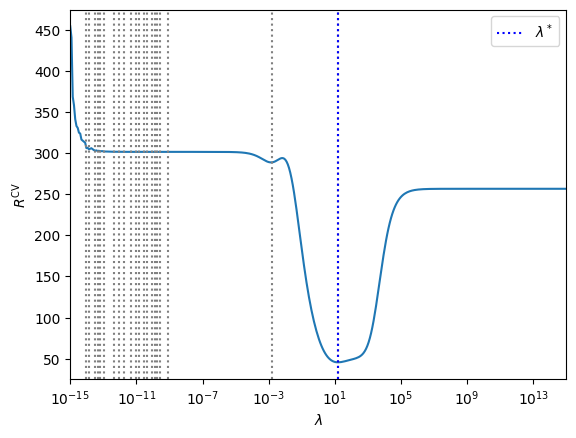

In [280]:
x, y = make_friedman1(noise=4.0, n_samples=100, n_features=100, random_state=5)
ridgeCV_fixed = RidgeLOOCV(alphas=np.logspace(-15, 15, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV_fixed.fit(x, y)
plot_lambda_risks(ridgeCV_fixed)

In [109]:
from scipy.signal import argrelmin

len(argrelmin(ridgeCV_fixed.loo_mse_, axis=0)[0])

57

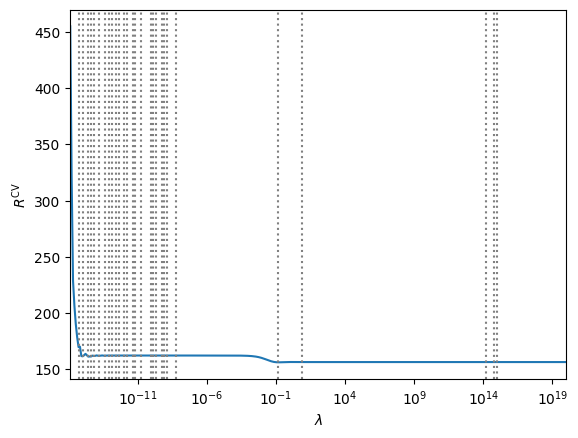

In [194]:
from sklearn.datasets import make_regression

x, y = make_regression(effective_rank=10, noise=10.0, random_state=1, tail_strength=0.5)
ridgeCV = RidgeLOOCV(alphas=np.logspace(-20, 20, 400, endpoint=True, base=10), fit_intercept=False, normalize=False)
ridgeCV.fit(x, y)
plot_lambda_risks(ridgeCV)
